In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

from tqdm.notebook import tqdm
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,  RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
#from catboost import CatBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_val_predict, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold

#from bayes_opt import BayesianOptimization


In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/dataset/submission.csv
/kaggle/input/dataset/train.csv
/kaggle/input/dataset/test.csv
/kaggle/input/advanced-dls-spring-2021/submission.csv
/kaggle/input/advanced-dls-spring-2021/train.csv
/kaggle/input/advanced-dls-spring-2021/test.csv


In [3]:
data = pd.read_csv('/kaggle/input/advanced-dls-spring-2021/train.csv') 
data_test = pd.read_csv('/kaggle/input/advanced-dls-spring-2021/test.csv') 
submission = pd.read_csv('/kaggle/input/advanced-dls-spring-2021/submission.csv')

In [4]:
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


теперь рассмотрим случайные пять строк из нашего датафрейма


In [5]:
data.sample (n= 10 )

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
2447,1,94.00,94,Male,1,No,No,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,1
2265,37,55.05,2030.75,Male,0,Yes,No,Yes,Yes,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Mailed check,0
1569,35,96.75,3403.4,Male,0,No,No,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,0
4242,32,83.70,2633.3,Male,0,No,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,Yes,One year,No,Credit card (automatic),0
1349,11,19.25,180.3,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,1
218,31,50.40,1580.1,Female,1,Yes,No,No,No phone service,DSL,Yes,Yes,Yes,No,No,Yes,One year,Yes,Credit card (automatic),0
5009,7,89.00,605.45,Male,1,Yes,No,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,0
2871,72,19.40,1363.25,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
3267,20,24.90,505.95,Female,0,No,No,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,No,Credit card (automatic),0
3413,45,100.85,4740,Male,0,No,No,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [7]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              1761 non-null   int64  
 1   MonthlySpending           1761 non-null   float64
 2   TotalSpent                1761 non-null   object 
 3   Sex                       1761 non-null   object 
 4   IsSeniorCitizen           1761 non-null   int64  
 5   HasPartner                1761 non-null   object 
 6   HasChild                  1761 non-null   object 
 7   HasPhoneService           1761 non-null   object 
 8   HasMultiplePhoneNumbers   1761 non-null   object 
 9   HasInternetService        1761 non-null   object 
 10  HasOnlineSecurityService  1761 non-null   object 
 11  HasOnlineBackup           1761 non-null   object 
 12  HasDeviceProtection       1761 non-null   object 
 13  HasTechSupportAccess      1761 non-null   object 
 14  HasOnlin

позже появятся проблемы с значениями, тк хоть среди данных и нет пропусков, есть пробелы:' ', заменим их на наны и удалим

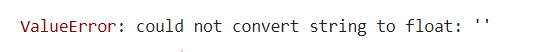

In [8]:
data = data.replace(' ', np.nan)
data_test = data_test.replace(' ', np.nan)


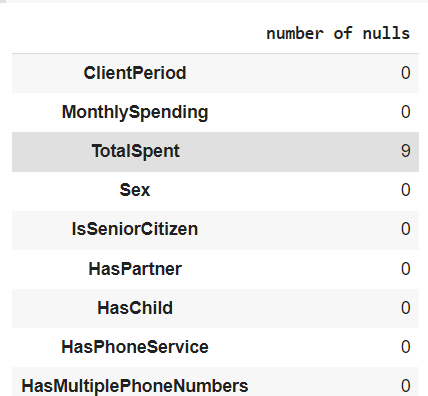![image.png]



In [9]:
dictionary = {'number of nulls': data.isnull().sum()}
df = pd.DataFrame(dictionary)
df

,number of nulls
ClientPeriod,0
MonthlySpending,0
TotalSpent,9
Sex,0
IsSeniorCitizen,0
HasPartner,0
HasChild,0
HasPhoneService,0
HasMultiplePhoneNumbers,0
HasInternetService,0


заменим на нулевые значения:


In [10]:
data = data.replace(np.nan, 0)
data_test = data_test.replace(np.nan, 0)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [12]:
# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [13]:

dictionary = {'number of nulls': data.isnull().sum()}
df = pd.DataFrame(dictionary)
df


,number of nulls
ClientPeriod,0
MonthlySpending,0
TotalSpent,0
Sex,0
IsSeniorCitizen,0
HasPartner,0
HasChild,0
HasPhoneService,0
HasMultiplePhoneNumbers,0
HasInternetService,0


распределение категориальных фичей:

In [14]:
for col in cat_cols:
    print(f"{col} DISTRIBUTION")
    print(data[col].value_counts())
    print()

Sex DISTRIBUTION
Sex
Male      2655
Female    2627
Name: count, dtype: int64

IsSeniorCitizen DISTRIBUTION
IsSeniorCitizen
0    4440
1     842
Name: count, dtype: int64

HasPartner DISTRIBUTION
HasPartner
No     2705
Yes    2577
Name: count, dtype: int64

HasChild DISTRIBUTION
HasChild
No     3676
Yes    1606
Name: count, dtype: int64

HasPhoneService DISTRIBUTION
HasPhoneService
Yes    4761
No      521
Name: count, dtype: int64

HasMultiplePhoneNumbers DISTRIBUTION
HasMultiplePhoneNumbers
No                  2511
Yes                 2250
No phone service     521
Name: count, dtype: int64

HasInternetService DISTRIBUTION
HasInternetService
Fiber optic    2341
DSL            1800
No             1141
Name: count, dtype: int64

HasOnlineSecurityService DISTRIBUTION
HasOnlineSecurityService
No                     2612
Yes                    1529
No internet service    1141
Name: count, dtype: int64

HasOnlineBackup DISTRIBUTION
HasOnlineBackup
No                     2332
Yes               

In [15]:
for i in range(len(num_cols)):
  fig = px.histogram(data, x=num_cols[i], histfunc='count')
  fig.show()


In [16]:
for i in range(len(cat_cols)):
  sum_counts = data[cat_cols[i]].value_counts().sort_index()
  catfig = go.Figure(go.Pie(values=sum_counts, labels=sum_counts.index),
                     layout=go.Layout(title=go.layout.Title(text=cat_cols[i])))
  catfig.show()

проанализируем распределение целевой переменной


In [17]:
sum_counts = data[target_col].value_counts().sort_index()
targetfig = go.Figure(go.Pie(values=sum_counts, labels=sum_counts.index),
                     layout=go.Layout(title=go.layout.Title(text="target")))
targetfig.show()

классы несбалансированы, но в данном случае не столь критично

In [18]:
prep = data.copy()
prep_fortest = data_test.copy()
binary_cols = [
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'IsBillingPaperless'
]

for column in binary_cols:
    prep[column] = prep[column].apply({'Yes': 1, 'No': 0}.get)
    prep_fortest[column] = prep_fortest[column].apply({'Yes': 1, 'No': 0}.get)
prep['Sex'] = prep['Sex'].apply({'Male': 1, 'Female': 0}.get)
prep_fortest['Sex'] = prep_fortest['Sex'].apply({'Male': 1, 'Female': 0}.get)

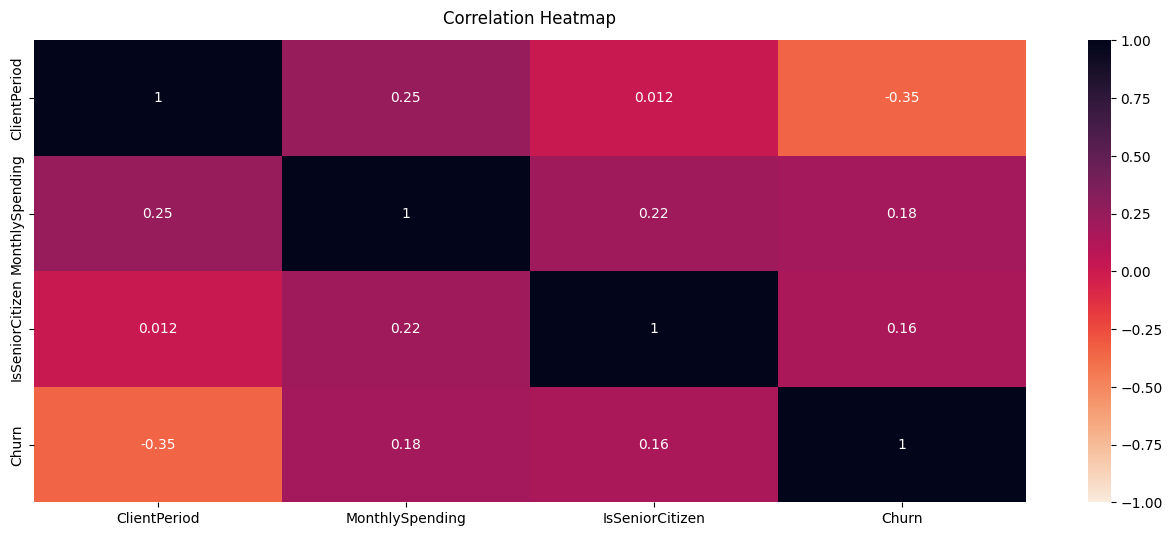

In [19]:
import seaborn as sns
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data.corr(numeric_only=True), vmin=-1, vmax=1, annot=True, cmap=sns.cm.rocket_r)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()

закодируем категориальные фичи с помощью one-hot-encoding'а

In [20]:
dummy_features = pd.get_dummies(data[cat_cols])
numeric_data = data[num_cols]

dummy_features_test = pd.get_dummies(data_test[cat_cols])
numeric_data_test = data_test[num_cols]


In [21]:
X = pd.concat([numeric_data, dummy_features], axis=1)
y = data[target_col]

X_test_origin = pd.concat([numeric_data_test, data_test[cat_cols]], axis=1)
X_test_origin1 = pd.concat([numeric_data_test, data_test[cat_cols]], axis=1)
X_test = pd.concat([numeric_data_test, dummy_features_test], axis=1)
#y_test = data_test[target_col]


In [22]:

X_test.head()


,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,42,56.10,2386.85,0,False,True,False,True,True,False,...,False,False,True,False,True,False,False,True,False,False
1,29,98.50,3004.15,1,False,True,False,True,True,False,...,True,True,False,False,False,True,False,False,True,False
2,9,76.25,684.85,0,False,True,True,False,True,False,...,False,True,False,False,False,True,False,False,True,False
3,67,74.00,4868.4,0,True,False,False,True,False,True,...,False,False,False,True,True,False,False,True,False,False
4,71,20.10,1389.6,0,True,False,False,True,False,True,...,False,False,False,True,True,False,True,False,False,False


разделим данные на тренировочную и тестовые части:





In [23]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X.values, y.values,
                                                    train_size=0.8,
                                                    random_state=42)

произведем нормализацию


In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[:,0:3])
X_valid_scaled = scaler.transform(X_valid[:,0:3])

X_test_scaled = scaler.transform(X_test[num_cols])
X_test_origin_scaled = scaler.transform(X_test_origin[num_cols])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



In [25]:
X_train_scaled = pd.DataFrame(data=X_train_scaled, columns = num_cols)
X_valid_scaled = pd.DataFrame(data=X_valid_scaled, columns = num_cols)
X_test_scaled = pd.DataFrame(data=X_test_scaled, columns = num_cols)
X_test_origin_scaled = pd.DataFrame(data=X_test_origin_scaled, columns = num_cols)

In [26]:
X_train[:,0:3] = X_train_scaled[num_cols]
#:,0:3
X_valid[:,0:3] = X_valid_scaled[num_cols]
X_test[num_cols] = X_test_scaled[num_cols]
X_test_origin[num_cols] = X_test_origin_scaled[num_cols]


используем логистическую регрессию:

In [27]:
params = {
              'penalty': ['l1', 'l2', 'elasticnet'],
              'solver': ['saga'],
              'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'max_iter': [50],
              'n_jobs': [-1]
}
init_clf = LogisticRegression(random_state=42)
grid_clf = GridSearchCV(init_clf, param_grid=params, cv=8, scoring='roc_auc')
grid_clf.fit(X_train, y_train)

clf_logreg = grid_clf.best_estimator_
clf_logreg.fit(X_train, y_train)

y_train_predicted = clf_logreg.predict_proba(X_train)[:, 1]
y_valid_predicted = clf_logreg.predict_proba(X_valid)[:, 1]

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/opt/conda/lib/python3.10/site-packages/

In [28]:
def draw(model):
    y_train_predicted = model.predict_proba(X_train)[:, 1]
    y_valid_predicted = model.predict_proba(X_valid)[:, 1]

    train_auc = roc_auc_score(y_train, y_train_predicted)
    valid_auc = roc_auc_score(y_valid, y_valid_predicted)

    plt.figure(figsize=(20,10))
    plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
    plt.plot(*roc_curve(y_valid, y_valid_predicted)[:2], label='valid AUC={:.4f}'.format(valid_auc))
    legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
    legend_box.set_facecolor("white")
    legend_box.set_edgecolor("black")
    plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
    plt.show()

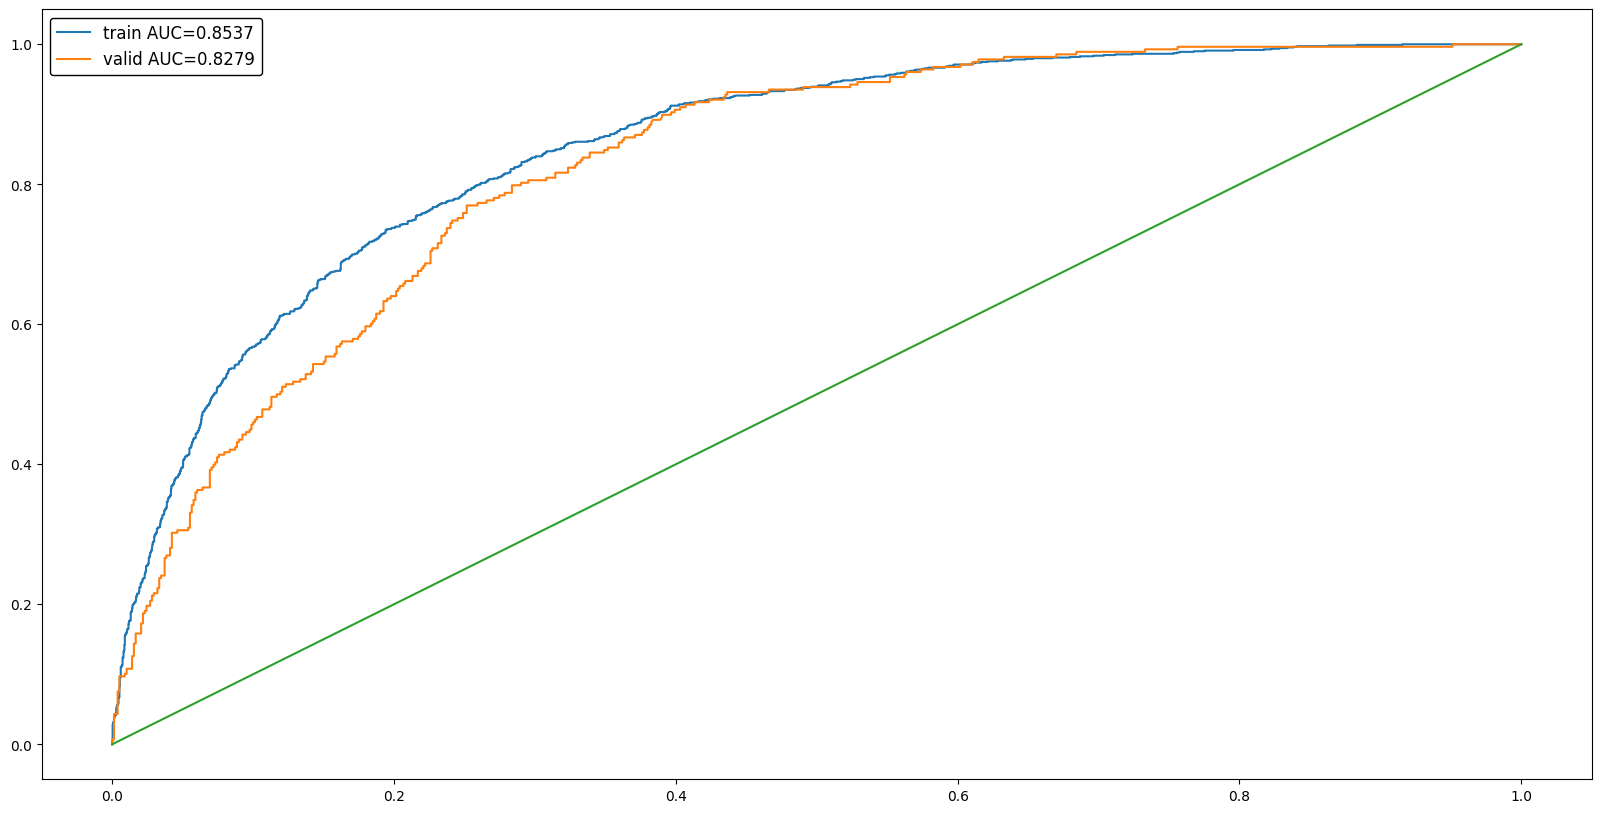

In [29]:
draw(clf_logreg)

Бустинг:


In [30]:
!pip install catboost

In [31]:
import xgboost
boosting_model2 = xgboost.XGBClassifier(n_estimators=500)

boosting_model2.fit(X_train, y_train)

y_train_predicted2 = boosting_model2.predict_proba(X_train)[:, 1]
y_valid_predicted2 = boosting_model2.predict_proba(X_valid)[:, 1]

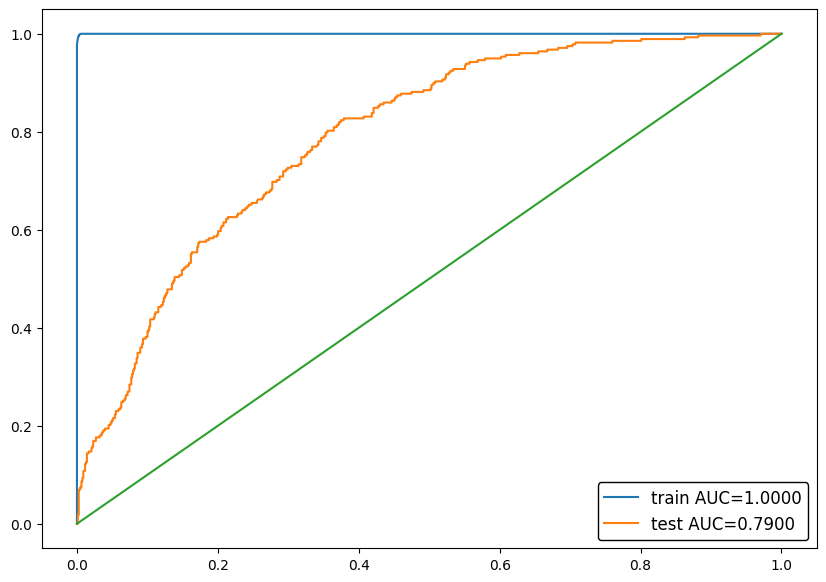

In [32]:
train_auc2 = roc_auc_score(y_train, y_train_predicted2)
valid_auc2 = roc_auc_score(y_valid, y_valid_predicted2)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train, y_train_predicted2)[:2], label='train AUC={:.4f}'.format(train_auc2))
plt.plot(*roc_curve(y_valid, y_valid_predicted2)[:2], label='test AUC={:.4f}'.format(valid_auc2))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

In [33]:
X_train3, X_valid3, y_train3, y_valid3 = train_test_split(data[feature_cols], data[target_col],
                                                       train_size=0.8,
                                                       random_state=42)
boosting_model = catboost.CatBoostClassifier(n_estimators=200,
                                             cat_features=cat_cols,
                                             bootstrap_type = 'Bayesian',
                                             eval_metric='AUC',
                                             verbose=False)
boosting_model.grid_search({'l2_leaf_reg': [0.01, 0.5, 1, 1.5],
                            'learning_rate': [0.01, 0.05, 0.1, 0.3, 1]},
                           X_train3,
                           y_train3, plot=True, refit=True, cv = 10)
boosting_model.fit(X_train3, y_train3)

y_train_predicted3 = boosting_model.predict_proba(X_train3)[:, 1]
y_valid_predicted3 = boosting_model.predict_proba(X_valid3)[:, 1]

NameError: name 'catboost' is not defined

In [ ]:
train_auc3 = roc_auc_score(y_train3, y_train_predicted3)
valid_auc3 = roc_auc_score(y_valid3, y_valid_predicted3)

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train3, y_train_predicted3)[:2], label='train AUC={:.4f}'.format(train_auc3))
plt.plot(*roc_curve(y_valid3, y_valid_predicted3)[:2], label='test AUC={:.4f}'.format(valid_auc3))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

Модель с лучшей точностью - последняя(boosting_model)





запишем предсказания:

In [ ]:
best_model = boosting_model

In [ ]:
submission['Churn'] = best_model.predict_proba(data_test)[:, 1]
submission.head()
submission.to_csv('./my_submission.csv', index=False)